In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import sys
import matplotlib

In [2]:
! pwd

/Users/qinghongxu/Desktop/Computing/bcdata/pims-bcdata18-cloudpbx/sample


In [3]:
DATA_ROOT = '../jackiexu/'
CSV_FILE_PATH = os.path.join(DATA_ROOT + 'a_ua_id_sub.csv')
GEOLITE_DB_PATH = os.path.join(DATA_ROOT,'GeoLite2-City.mmdb')

In [4]:
df = pd.read_csv(CSV_FILE_PATH)

In [6]:
HEADER = ["ID","calldate","callend","duration","connect_duration","progress_time","first_rtp_time","caller",
          "caller_domain","caller_reverse","callername","callername_reverse","called","called_domain","called_reverse",
          "sipcallerip","sipcallerport","sipcalledip","sipcalledport","whohanged","bye","lastSIPresponse_id",
          "lastSIPresponseNum","sighup","dscp","a_index","b_index","a_payload","b_payload","a_saddr","b_saddr",
          "a_received","b_received","a_lost","b_lost","a_ua_id","b_ua_id","a_avgjitter_mult10","b_avgjitter_mult10",
          "a_maxjitter","b_maxjitter","a_sl1","a_sl2","a_sl3","a_sl4","a_sl5","a_sl6","a_sl7","a_sl8","a_sl9","a_sl10",
          "a_d50","a_d70","a_d90","a_d120","a_d150","a_d200","a_d300","b_sl1","b_sl2","b_sl3","b_sl4","b_sl5","b_sl6","b_sl7",
          "b_sl8","b_sl9","b_sl10","b_d50","b_d70","b_d90","b_d120","b_d150","b_d200","b_d300","a_mos_lqo_mult10",
          "b_mos_lqo_mult10","a_mos_f1_mult10","a_mos_f2_mult10","a_mos_adapt_mult10","b_mos_f1_mult10","b_mos_f2_mult10",
          "b_mos_adapt_mult10","a_rtcp_loss","a_rtcp_maxfr","a_rtcp_avgfr_mult10","a_rtcp_maxjitter","a_rtcp_avgjitter_mult10",
          "b_rtcp_loss","b_rtcp_maxfr","b_rtcp_avgfr_mult10","b_rtcp_maxjitter","b_rtcp_avgjitter_mult10","a_last_rtp_from_end",
          "b_last_rtp_from_end","payload","jitter_mult10","mos_min_mult10","a_mos_min_mult10","b_mos_min_mult10",
          "packet_loss_perc_mult1000","a_packet_loss_perc_mult1000","b_packet_loss_perc_mult1000","delay_sum","a_delay_sum",
          "b_delay_sum","delay_avg_mult100","a_delay_avg_mult100","b_delay_avg_mult100","delay_cnt","a_delay_cnt",
          "b_delay_cnt","rtcp_avgfr_mult10","rtcp_avgjitter_mult10","lost","id_sensor","price_operator_mult100",
          "price_operator_currency_id","price_customer_mult100","price_customer_currency_id","reason_sip_cause",
          "reason_sip_text_id","reason_q850_cause","reason_q850_text_id","caller_silence","called_silence",
          "caller_silence_end","called_silence_end","a_mos_xr_min_mult10","b_mos_xr_min_mult10","a_mos_xr_mult10",
          "b_mos_xr_mult10","response_time_100","response_time_xxx","a_mos_f1_min_mult10","a_mos_f2_min_mult10",
          "a_mos_adapt_min_mult10","b_mos_f1_min_mult10","b_mos_f2_min_mult10","b_mos_adapt_min_mult10","a_rtp_ptime",
          "b_rtp_ptime","flags"]

In [12]:
# read dataframe. calldate and callend are the only date columns
df = pd.read_csv(CSV_FILE_PATH, names = HEADER)
#df = df[DESCRIBED_COLUMNS]
# remo`ve any columns that are entirely NA.
df.dropna(axis = 1, how = 'all', inplace=True)
# some columns have "sanitized" written the whole way down:
#    remove these.
df = df.loc[:, ~(df == 'sanitized').all(axis=0)]
# ## sighup was removed by the DESCRIBED_COLUMNS subsetting
# XX sighup column is entirely zeros. remove it. 
# XX df.drop(columns=['sighup'], inplace=True) 
# create a version of duration column of type timedelta
df.drop(columns=[col for col in df.columns if 'reverse' in col], inplace=True)
#df['duration_td'] = df.callend - df.calldate

# a dataframe where the rows have been removed if 
# there are more than 60% NA values in those rows.
df_dens = df.dropna(axis=0, thresh = 79)



NameError: name 'HEADER' is not defined

In [5]:
FILEPATH='../data/pims_cloudpbx_cdrua_201806061020.csv'
df_ua_id = pd.read_csv(FILEPATH,sep='\t')
#filter_3 = df_ua_id['id'] == df_ua_id_all
#d_val = df_ua_id_all['filter_3']

In [18]:
df_b_ua_id = df['a_ua_id'].convert_objects(convert_numeric=True).dropna()
#df_b_ua_id = df.loc[type(df['b_ua_id']) == int]
#df_b_ua_id = df['b_ua_id']
#df_b_ua_id = df['b_ua_id']
#df_b_ua_id.drop()
#df_b_ua_id.dropna(inplace=True)
#df_b_ua_id
b_ua_id = set(df_b_ua_id.values)
b_ua_id_int = [int(n) for n in list(df_b_ua_id)]
df_ua_id_all = pd.DataFrame(b_ua_id_int,columns=['id'])
#df_ua_id_all['id'] = df_ua_id
#df_ua_id_all['names'] = df_b_ua_id
df_ua_id_all_merge = df_ua_id_all.merge(df_ua_id, on='id')
#df_ua_id_all_merge.groupby('ua').agg(['count'])
df_ua_id_all_merge
#df_ua_id_all_merge.groupby('ua').count()
#df = df_ua_id_all_merge.sort_values(by=['id'], ascending=False)
df_ua = df_ua_id_all_merge.groupby('ua').agg({'id':'count'}).reset_index().rename(columns={'id':'id count'})
df_ua

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



,ua,id count
0,2600hz,274595
1,3CXPhoneSystem 15.5.10244.4 (9880),1355
2,AUDC-IPPhone/1.2.2_build_5 (320HD; 00908F22412A),42
3,AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 0...,97
4,AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 0...,218
5,AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 0...,1
6,AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 0...,8
7,AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 0...,153
8,AUDC-IPPhone/1.6.0_p008_build_44_ce6 (320HD; 0...,186
9,Aastra 53i/2.5.2.1500,81


In [33]:
#df_ua_id_all_merge.drop_duplicates(inplace=True)
df_ua = df_ua.sort_values(by=['id count'], ascending=False)
df_ua
#df['id']
df_filter_1 = df_ua[df_ua['ua'].str.contains("Yealink ")]
df_filter_2 = df_ua[df_ua['ua'].str.contains("Polycom")]
df_filter_3 = df_ua[df_ua['ua'].str.contains("Grandstream")]
df_filter_4 = df_ua[df_ua['ua'].str.contains("Bria 4")]
df_filter_5 = df_ua[df_ua['ua'].str.contains("Aastra")]
df_filter_6 = df_ua[df_ua['ua'].str.contains("PJSUA")]
#df_filter = df_ua[like=='Polycom', axis=0] #601170
print(df_filter_1.sum())
print(df_filter_2.sum())
print(df_filter_3.sum())
print(df_filter_4.sum())#326575
print(df_filter_5.sum())
print(df_filter_6.sum())

ua          Yealink SIP-T46G 28.80.0.70Yealink SIP-T46S 66...
id count                                                10554
dtype: object
ua          PolycomVVX-VVX_411-UA/5.6.0.17325Polycom/5.4.1...
id count                                               144780
dtype: object
ua          Grandstream GXP2135 1.0.9.63Grandstream GXP216...
id count                                                47448
dtype: object
ua          Bria 4 release 4.8.1 stamp 84929Bria 4 release...
id count                                                48178
dtype: object
ua          Aastra 6731i/3.2.2.2077Aastra 55i/3.2.2.3077Aa...
id count                                                32910
dtype: object
ua          PJSUA v2.6 Linux-3.16.0.4/x86_64/glibc-2.19
id count                                           4892
dtype: object


In [11]:
num = df_ua_id_all['id'].convert_objects(convert_numeric=True).dropna()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [32]:
df_ua

,ua,id count
0,2600hz,274595
62,Bria 4 release 4.8.1 stamp 84929,32074
125,Grandstream GXP2135 1.0.9.63,23782
352,PolycomVVX-VVX_411-UA/5.6.0.17325,12648
225,Polycom/5.4.1.14510 PolycomVVX-VVX_410-UA/5.4....,12012
227,Polycom/5.4.1.14510 PolycomVVX-VVX_500-UA/5.4....,11447
249,Polycom/5.5.0.20556 PolycomVVX-VVX_411-UA/5.5....,8473
37,Aastra 6731i/3.2.2.2077,7025
59,Bria 4 release 4.4.0 stamp 79956,6970
308,PolycomVVX-VVX_300-UA/5.0.2.2756,6501


TypeError: pie() got an unexpected keyword argument 'fontsize'

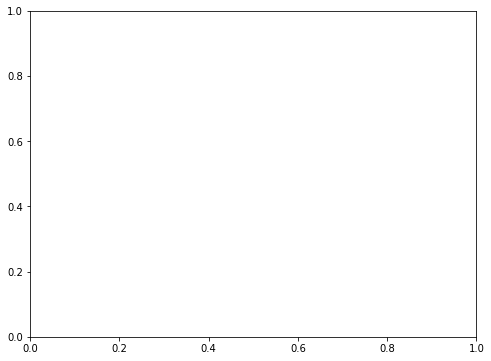

In [44]:
labels = 'Bria', 'Aastra', 'Grandstream', 'Others','Yealink','Polycom'
sizes = [14.7, 10, 14.5, 13.3,3.2,44.3]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightyellow','red']
explode = (0,0, 0, 0, 0,0)  # explode 1st slice
 
# Plot
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
ax.axis('equal')
fig.savefig('brands.png')
plt.show()